In [3]:
import pickle
with open('ROMS_26yr_COWed_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

In [4]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

def add_days_to_date(days_to_adds):
    new_dates = []
    for day_to_add in days_to_adds:
        day_to_add = day_to_add + 1462
        input_date = '1990-01-01 00:00:00' # Beginning date of file 1462
        if not isinstance(input_date, datetime):
            input_date = datetime.strptime(input_date, '%Y-%m-%d %H:%M:%S')
        if isinstance(day_to_add, np.ndarray):
            day_to_add = day_to_add.item()
        new_date = input_date + timedelta(days=day_to_add)
        new_dates.append(new_date)
    return new_dates
    
def extract_numbers_from_list(strings):
    numbers = [int(''.join(filter(str.isdigit, s))) for s in strings if ''.join(filter(str.isdigit, s))]
    return numbers

### Prepare Dataset

In [5]:
for eddy in eddies:
    eddies[eddy]['Date'] = add_days_to_date(extract_numbers_from_list(eddies[eddy].index.tolist()))
clim_dataset = pd.DataFrame()
for eddy in eddies.values():
    if not eddy.empty:
        clim_dataset = pd.concat([clim_dataset, eddy], ignore_index=True)
clim_dataset = clim_dataset[clim_dataset['Tilt Distance'] < 150000]

In [6]:
clim_dataset

,Lon,Lat,Vort,ID,Age,Tilt Bearing,Tilt Distance,Date
0,158.618129,-35.131968,-0.000032,1,13,339.113138,11473.078055,1994-01-03
1,153.203506,-39.514949,-0.000008,2,18,86.820975,7375.861001,1994-01-03
2,153.082730,-39.563075,-0.000014,2,18,284.963141,1799.220737,1994-01-07
3,153.120298,-39.397832,-0.000003,2,18,158.777972,12922.677725,1994-01-18
4,151.579918,-38.160585,0.000034,3,39,206.122255,13262.693830,1994-01-07
...,...,...,...,...,...,...,...,...
64202,155.403963,-34.428320,-0.000012,14743,13,222.152868,19035.120768,2019-02-19
64203,155.419475,-34.385971,-0.000012,14743,13,228.724082,14458.274225,2019-02-20
64204,153.493266,-36.002150,0.000037,14744,12,318.817320,2816.112809,2019-02-12
64205,153.623730,-35.828446,0.000039,14744,12,252.770411,4962.720418,2019-02-16


In [8]:

edata = clim_dataset[clim_dataset.ID==790]


/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1515: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


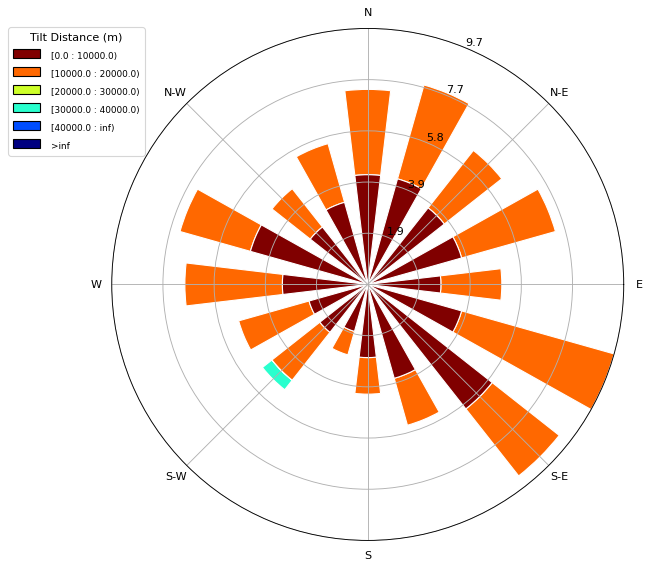

In [9]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np


ws = np.array(edata['Tilt Distance'])
wd = np.array(edata['Tilt Bearing'])

# Define custom bins
bins = [0, 10000, 20000, 30000, 40000, np.inf]


# Create the Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, bins=bins, opening=0.6, edgecolor='white', cmap=cm.jet_r)
ax.set_legend(title='Tilt Distance (m)', fontsize='large', loc='upper left', bbox_to_anchor=(-0.2, 1))
ax.grid(True)
plt.show()

<Axes: xlabel='Date'>

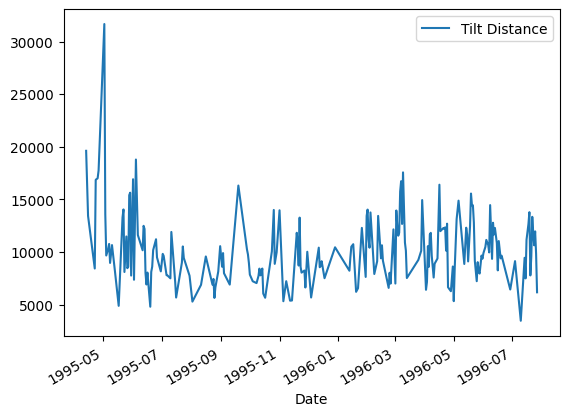

In [12]:
edata.plot(x='Date',y='Tilt Distance')

In [15]:
theta = np.rad2deg(np.atan(edata['Tilt Distance']/800))

In [16]:
theta

3698    87.665232
3699    86.592910
3700    84.588139
3701    87.285069
3702    87.307637
          ...    
3911    86.133685
3912    85.703995
3913    86.176733
3914    85.355818
3915    82.630804
Name: Tilt Distance, Length: 217, dtype: float64

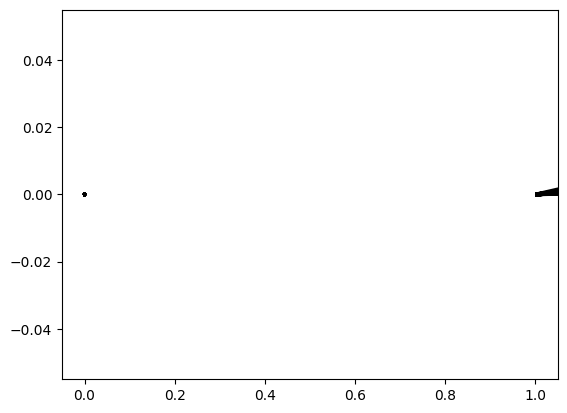

In [21]:
for l in edata['Tilt Distance']:
    plt.quiver([0,l],[0,800])